In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=70f552ae6d90639bd6153c67a84dc172ee43bd64f01f367898991a8d396f3684
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=cb78c0e5795e11f56e1c794a99786ad1df134561db20016f59d19b74d0288b5c
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd99

In [ ]:
import scanpy as sc
import os

In [ ]:
# Figure parameters
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.23.5 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.1 pynndescent==0.5.11


In [ ]:
# Load Data
# Peripheral Blood Mononuclear Cells (PBMC) data
# https://scanpy.readthedocs.io/en/stable/api.html#module-scanpy.datasets

#adata = sc.datasets.pbmc3k()
#adata

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [ ]:
filt_folder = r"/content/drive/MyDrive/ColabNotebooks/hg19"

In [ ]:
print(os.listdir(filt_folder))

['barcodes.tsv', 'matrix.mtx', 'genes.tsv']


In [ ]:
adata = sc.read_10x_mtx(filt_folder, var_names = 'gene_symbols',cache=True)

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
print(adata.obs.info())
print('')
print('##########################################')
print('')
print(adata.var.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, AAACATACAACCAC-1 to TTTGCATGCCTCAC-1
Empty DataFrame
None

##########################################

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, MIR1302-10 to AC002321.1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gene_ids  32738 non-null  object
dtypes: object(1)
memory usage: 511.5+ KB
None


In [ ]:
adata.obs.head()

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [ ]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [ ]:
# https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/

adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Column format>

In [ ]:
"""
adata.to_df() fonksiyonu, Scanpy'de anndata veri yapısındaki verileri bir Pandas DataFrame'e dönüştürmek için kullanılır.
Bu fonksiyon, hücrelerin gen ifadelerini içeren ana matrisi (adata.X), gen özelliklerini (adata.var),
hücre özelliklerini (adata.obs) ve diğer veri özelliklerini bir DataFrame'e dönüştürür.
"""
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


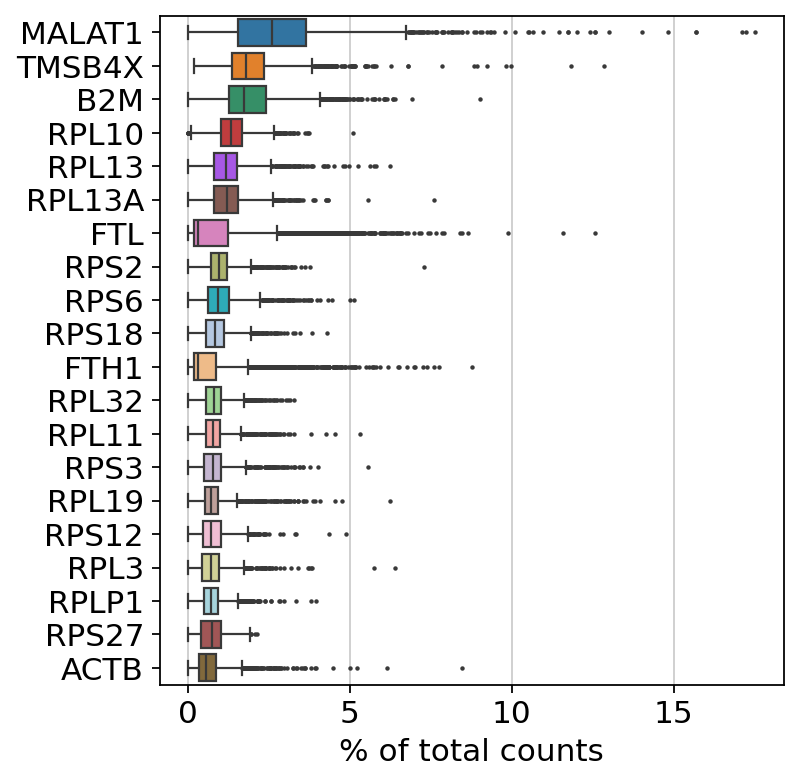

In [ ]:
# Bu kod, adata veri yapısındaki hücrelerdeki en yüksek ifadeye sahip olan 20 geni gösteren bir bar grafiği oluşturacaktır

sc.pl.highest_expr_genes(adata, n_top=20)

Populating obs and var dataframes with QC stats

In [ ]:
adata_wQC = adata.copy()
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)

In [ ]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
adata_wQC.obs

,n_genes_by_counts,total_counts
AAACATACAACCAC-1,781,2421.0
AAACATTGAGCTAC-1,1352,4903.0
AAACATTGATCAGC-1,1131,3149.0
AAACCGTGCTTCCG-1,960,2639.0
AAACCGTGTATGCG-1,522,981.0
...,...,...
TTTCGAACTCTCAT-1,1155,3461.0
TTTCTACTGAGGCA-1,1227,3447.0
TTTCTACTTCCTCG-1,622,1684.0
TTTGCATGAGAGGC-1,454,1024.0


In [ ]:
adata_wQC.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0
FAM138A,ENSG00000237613,0,0.0,100.0,0.0
OR4F5,ENSG00000186092,0,0.0,100.0,0.0
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0
...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0
BAGE5,ENSG00000268590,0,0.0,100.0,0.0
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0


Populating obs/var dataframes columns manually

In [ ]:
adata_wQC.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [ ]:
"""
Bu kod, Scanpy veri yapısındaki genlerin isimlerini kontrol ederek, genlerin isimlerinin 'MT-' ile başlayıp başlamadığını kontrol eder.
Bu tür bir kontrol genellikle mitochondrial genlerin (MT-gene) varlığını tespit etmek ve bu genleri filtrelemek amacıyla yapılır.
"""
adata_wQC.var_names.str.startswith('MT-')

array([False, False, False, ..., False, False, False])

In [ ]:
adata_wQC.var['mt'] = adata_wQC.var_names.str.startswith('MT-')
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [ ]:
adata_wQC.var['mt']

MIR1302-10      False
FAM138A         False
OR4F5           False
RP11-34P13.7    False
RP11-34P13.8    False
                ...  
AC145205.1      False
BAGE5           False
CU459201.1      False
AC002321.2      False
AC002321.1      False
Name: mt, Length: 32738, dtype: bool

In [ ]:
# mitochondrial genes
for gene_name in adata_wQC.var_names[adata_wQC.var['mt']]:
    print(gene_name)

MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4
MT-ND5
MT-ND6
MT-CYB


In [ ]:
adata_wQC.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mt
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0,False
FAM138A,ENSG00000237613,0,0.0,100.0,0.0,False
OR4F5,ENSG00000186092,0,0.0,100.0,0.0,False
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0,False
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0,False
...,...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0,False
BAGE5,ENSG00000268590,0,0.0,100.0,0.0,False
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0,False
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0,False


In [ ]:
"""
Bu kod, Scanpy kütüphanesinin sc.pp.calculate_qc_metrics fonksiyonunu kullanarak hücre kalite kontrol (QC) metriklerini hesaplar ve
bu metrikleri adata_wQC veri yapısına uygular.
Bu işlem genellikle hücre kalitesini değerlendirmek ve gerektiğinde hücreleri filtrelemek için kullanılır.
"""
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)

In [ ]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [ ]:
# MT genleri üzerinde hücre kalite kontrol işlemi yapılır
sc.pp.calculate_qc_metrics(adata_wQC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

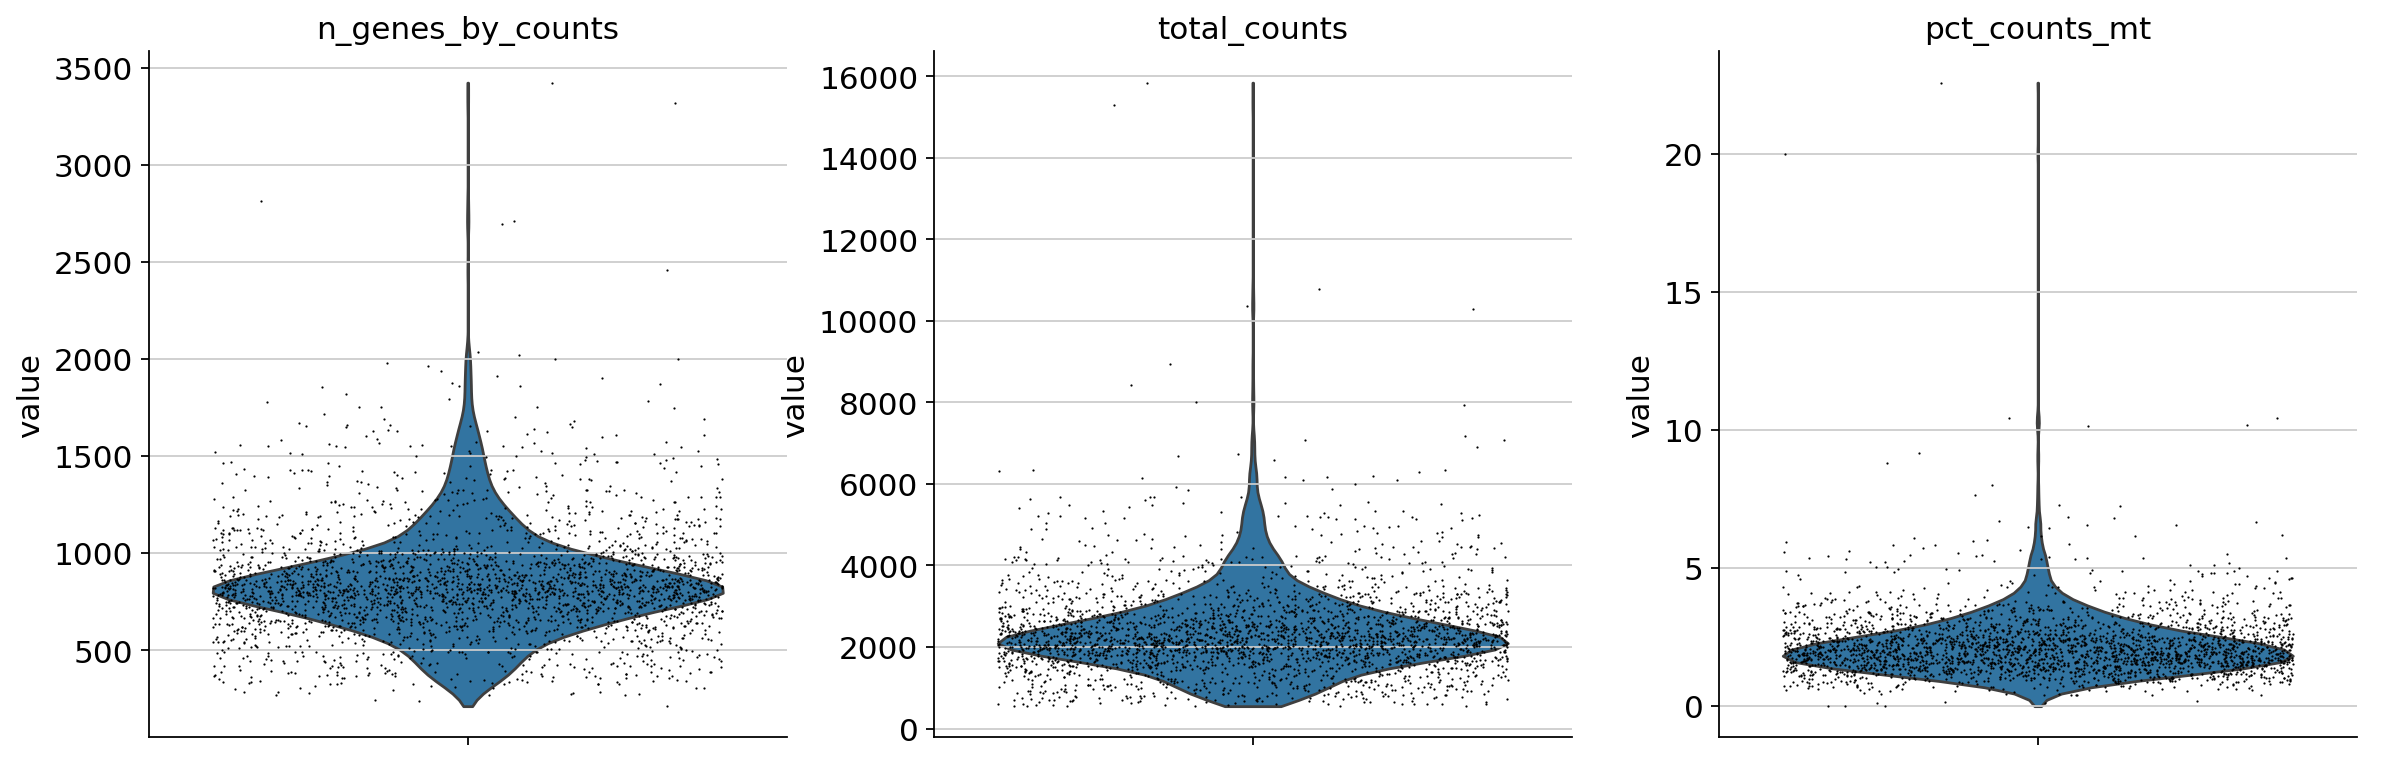

In [ ]:
sc.pl.violin(adata_wQC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

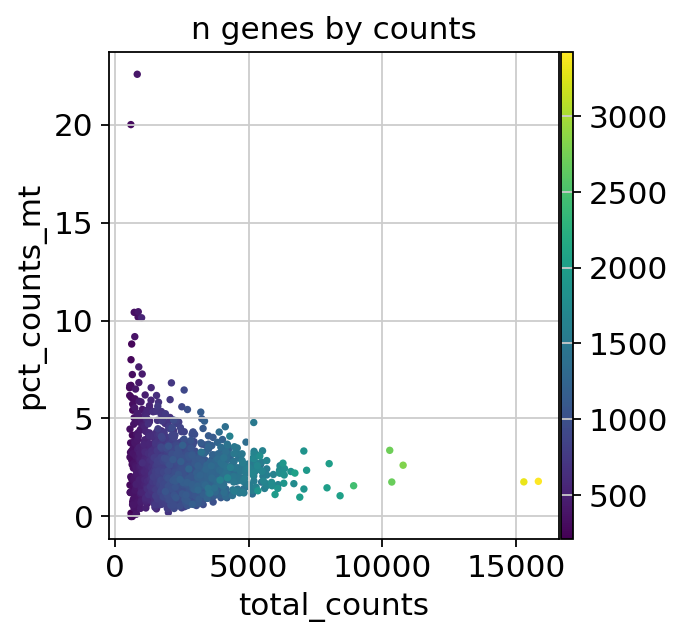

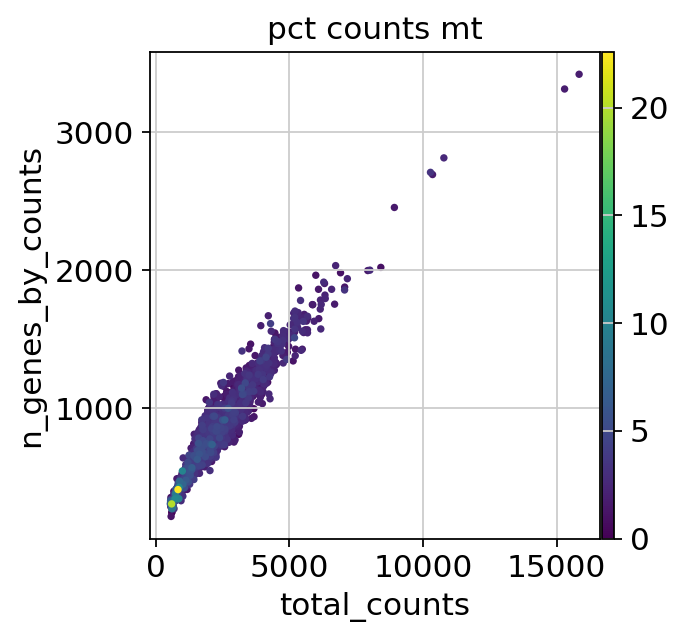

In [ ]:
"""
İlk scatter plot'ta 'total_counts' (toplam gen ifade sayısı) ile 'pct_counts_mt' (mt genlerinin toplam gen ifadesi içindeki yüzdesi) arasındaki ilişkiyi gösterir.
Ayrıca, noktaların renkleri 'n_genes_by_counts' (gen sayısı) değişkenine göre kodlanır.

İkinci scatter plot'ta 'total_counts' (toplam gen ifade sayısı) ile 'n_genes_by_counts' (gen sayısı) arasındaki ilişkiyi gösterir.
Ayrıca, noktaların renkleri 'pct_counts_mt' (mt genlerinin toplam gen ifadesi içindeki yüzdesi) değişkenine göre kodlanır.
"""

sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

Filtering cells and genes

Filtering cells with < 200 genes and higher mt genes (>5%)

In [ ]:
adata_wQC_filt = adata_wQC.copy()
print(adata_wQC)
sc.pp.filter_cells(adata_wQC_filt, min_genes=200)
print(adata_wQC_filt)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.pct_counts_mt < 5, :]
print(adata_wQC_filt)

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


Possible doublet cells

In [ ]:
print(adata_wQC_filt)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.n_genes_by_counts < 2500, :]
print(adata_wQC_filt)

View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


In [ ]:
print(adata_wQC_filt)
sc.pp.filter_genes(adata_wQC_filt, min_cells=3)
print(adata_wQC_filt)

View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


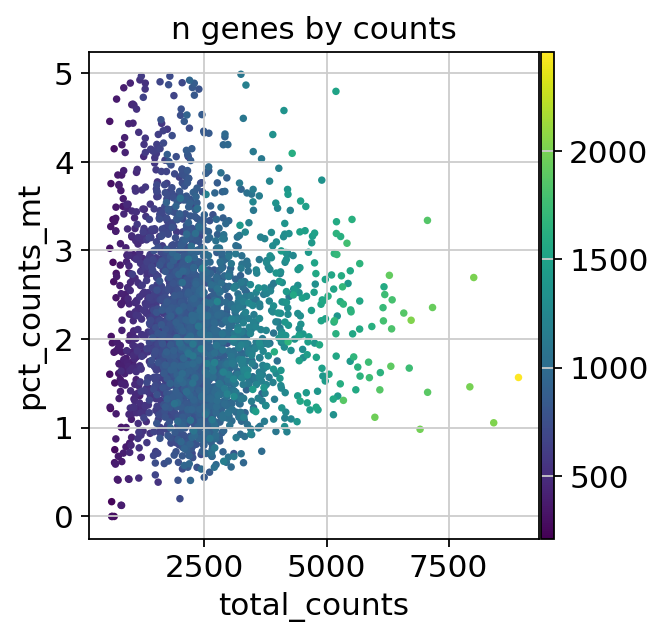

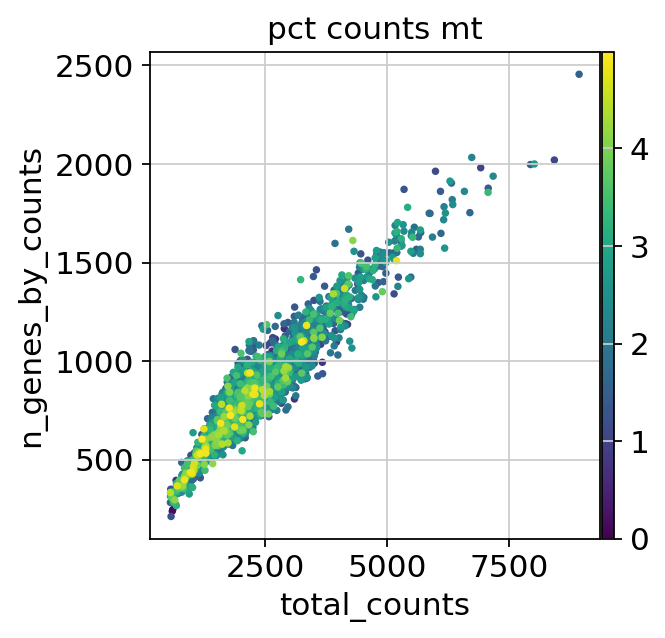

In [ ]:
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

Normalization and Log transformation

In [ ]:
"""
Normalizasyon işlemi: Gen ifade değerlerini bir hücredeki toplam gen ifadesine bölerek,
tüm hücrelerin toplam gen ifadesini belirli bir hedef toplam gen ifadesine ayarlar.
"""
norm_data = adata_wQC_filt.copy()

sc.pp.normalize_total(norm_data, target_sum=1e4)
norm_data

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

In [ ]:
#log n+1 dönüşümü
sc.pp.log1p(norm_data)

In [ ]:
norm_data

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'

HVG vs DEG

In [ ]:
HVG_data = norm_data.copy()
sc.pp.highly_variable_genes(HVG_data, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
print(norm_data)
print("#######################################")
print(HVG_data)

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'
#######################################
AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [ ]:
HVG_data.var['highly_variable']

AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
                 ...  
AC145212.1       False
AL592183.1       False
AL354822.1       False
PNRC2-1          False
SRSF10-1         False
Name: highly_variable, Length: 13656, dtype: bool

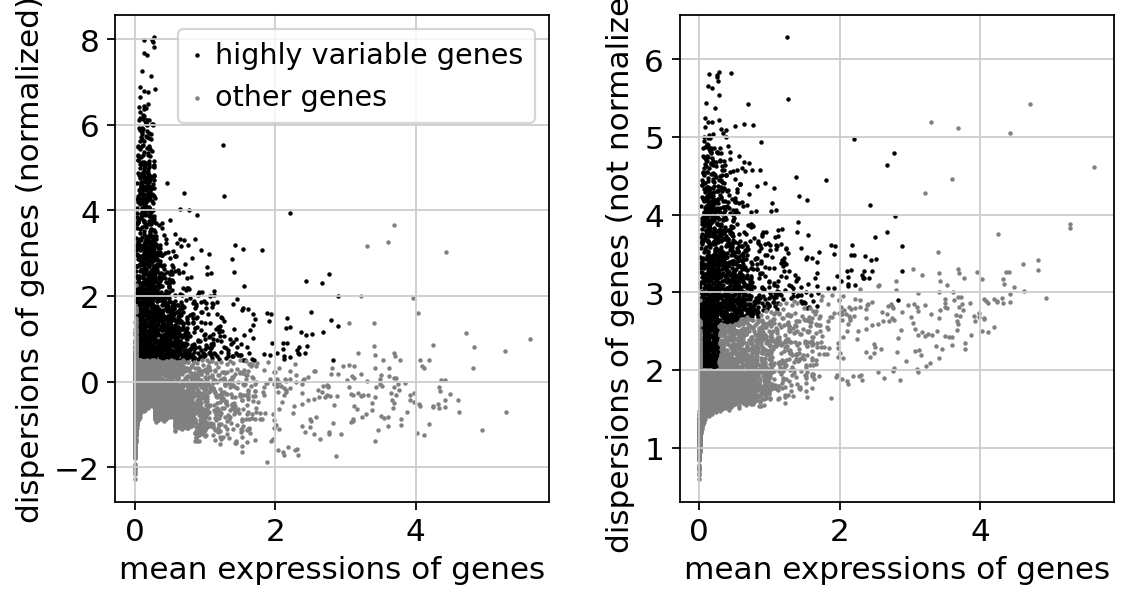

In [ ]:
# yüksek değişkenlik gösteren genleri görselleştirmek

sc.pl.highly_variable_genes(HVG_data)

In [ ]:
"""
Bu satır, HVG_data veri yapısındaki gen ifade matrisini yalnızca yüksek değişkenlik gösteren genleri içerecek şekilde filtreler.
Bu, analizde kullanılacak gen setini daraltmaya yönelik bir adımdır.
HVG_data veri yapısındaki gen ifade matrisi, artık yalnızca yüksek değişkenlik gösteren genlere ait sütunları içerir.
"""

HVG_data = HVG_data[:, HVG_data.var.highly_variable]
HVG_data

View of AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

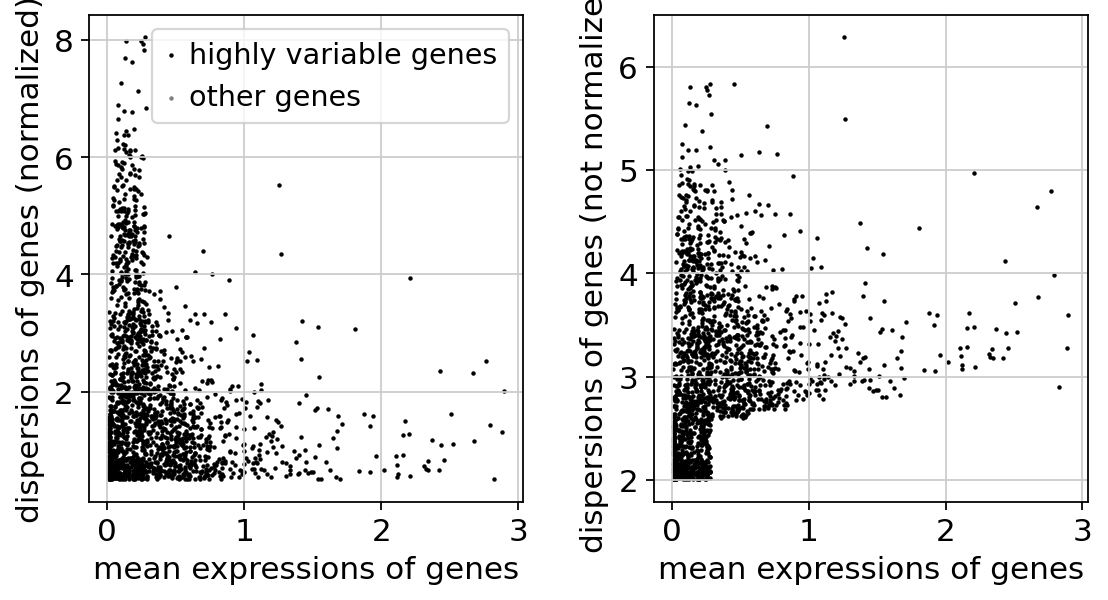

In [ ]:
sc.pl.highly_variable_genes(HVG_data)

Scaling the data

In [ ]:
pcHVG_data = HVG_data.copy()

"""
Bu kod, sc.pp.scale fonksiyonunu kullanarak gen ifade değerlerini ölçeklendirmek için bir işlem gerçekleştirir.
Bu tür bir ölçekleme genellikle, gen ifade matrisindeki değerleri birbirine daha yakın bir aralığa getirmek ve analizlerde daha tutarlı sonuçlar elde etmek amacıyla kullanılır.
"""

sc.pp.scale(pcHVG_data, max_value=10)

In [ ]:
print(HVG_data)
print(pcHVG_data)

View of AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'


Dimensionality reduction with PCA

In [ ]:
sc.tl.pca(pcHVG_data)

In [ ]:
print(pcHVG_data)

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


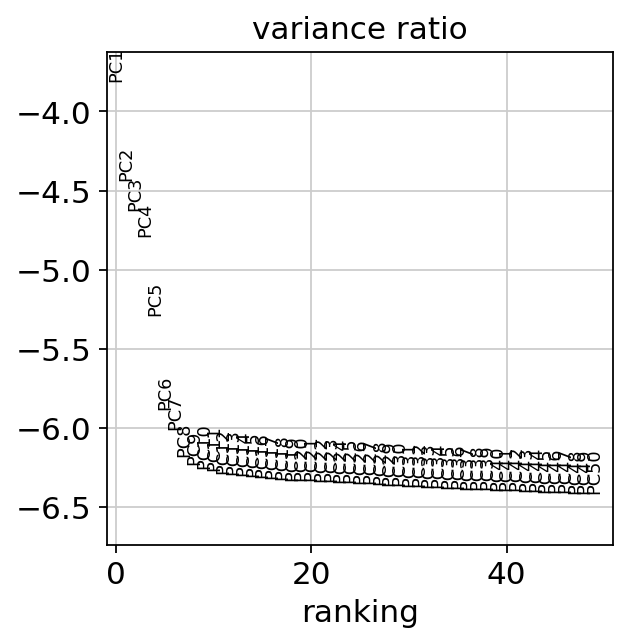

In [ ]:
"""
PCA sonuçlarının varyans açıklama oranlarını görselleştirmek için bir işlem gerçekleştirir.
PCA sonuçlarından elde edilen temel bileşenlerin her birinin, toplam varyans içindeki katkısını gösteren bir çubuk grafik oluşturulur.
"""

sc.pl.pca_variance_ratio(pcHVG_data, log=True, n_pcs=50)

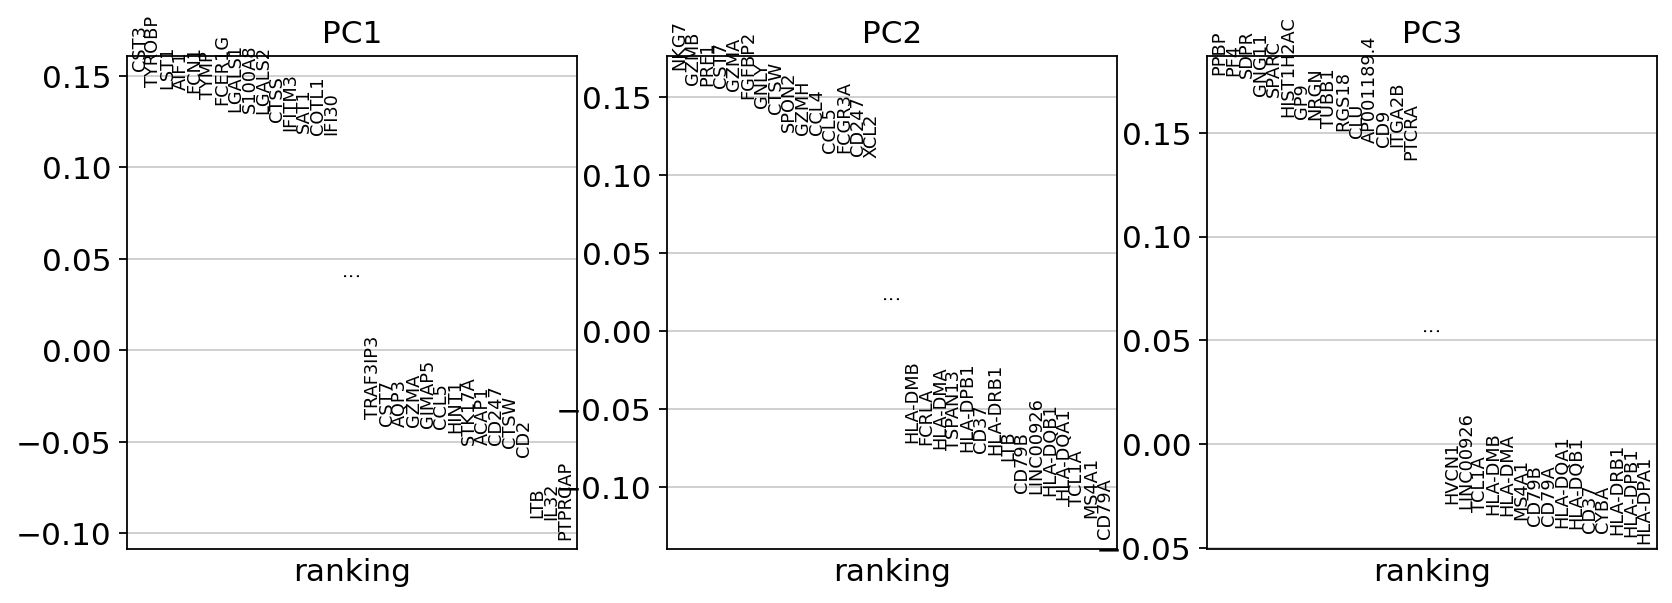

In [ ]:
"""
PCA sonuçlarından elde edilen temel bileşenlerin gen ifade matrisine olan katkılarını görselleştirmek için kullanılır.
Bu tür bir analiz, gen ifade verilerindeki ana varyansı temsil eden genleri belirleme ve anlama amacıyla kullanılır.
"""
sc.pl.pca_loadings(pcHVG_data)

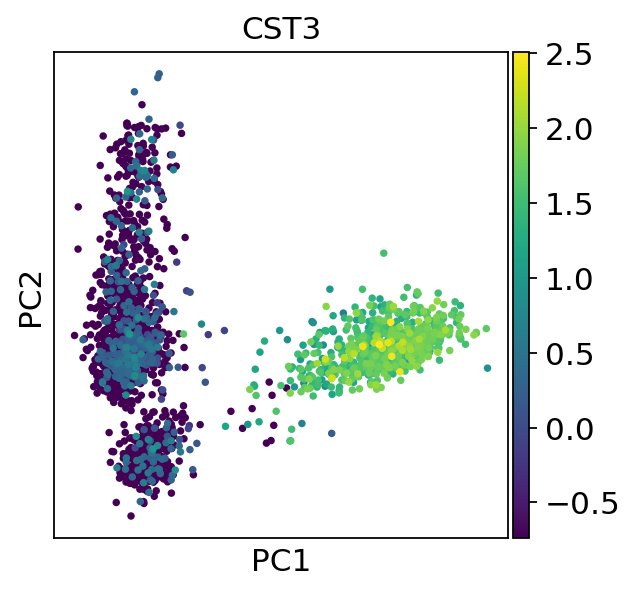

In [ ]:
"""
PCA sonuçlarını görselleştirmek için bir işlem gerçekleştirir ve belirli bir genin temel bileşenlere olan etkisini renklendirir.
Bu örnekte, 'CST3' geni seçilmiştir.
Belirli bir genin veri setindeki varyansı ne ölçüde açıkladığını anlamak ve bu genin özellikle hangi temel bileşenlere bağlı olduğunu görmek için kullanışlıdır.
"""

sc.pl.pca(pcHVG_data, color='CST3')

Finding Neighbors by computing the neighborhood graph

In [ ]:
"""
pcHVG_data veri yapısındaki hücreler arasındaki komşuluk ilişkilerini belirlemek için bir işlem gerçekleştirir.
Bu işlem, hücrelerin gen ifade profilleri temel alınarak, hücreler arasındaki benzerlik veya uzaklık ilişkilerini belirleyen bir komşuluk grafiği oluşturur.
Bu grafikte  genellikle veri setindeki benzer gen ifade profillerine sahip hücreler birbirine daha yakın,
farklı profillere sahip hücreler ise birbirine daha uzak olarak kabul edilir.
"""

sc.pp.neighbors(pcHVG_data, n_pcs=15)

In [ ]:
pcHVG_data

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
pcHVG_data.obsp

PairwiseArrays with keys: distances, connectivities

In [ ]:
for key, value in pcHVG_data.obsp.items():
    print("key: ", key)
    print("value: ", value)

key:  distances
value:    (0, 136)	4.820786476135254
  (0, 305)	4.4366559982299805
  (0, 474)	4.1951141357421875
  (0, 518)	3.861983299255371
  (0, 618)	4.948592662811279
  (0, 671)	4.9002580642700195
  (0, 703)	4.733336448669434
  (0, 963)	4.3977580070495605
  (0, 1240)	4.9945149421691895
  (0, 1345)	4.794633865356445
  (0, 1769)	4.374863147735596
  (0, 1980)	4.5356340408325195
  (0, 2148)	4.8445143699646
  (0, 2165)	4.844890594482422
  (1, 10)	5.912168502807617
  (1, 107)	6.15634298324585
  (1, 165)	4.280954837799072
  (1, 351)	5.9431962966918945
  (1, 561)	6.011054039001465
  (1, 930)	5.750189304351807
  (1, 999)	5.733265399932861
  (1, 1049)	6.315434455871582
  (1, 1054)	5.832818984985352
  (1, 1203)	6.469548225402832
  (1, 1638)	6.198696613311768
  :	:
  (2636, 683)	4.698347091674805
  (2636, 854)	4.85258150100708
  (2636, 1413)	4.58799934387207
  (2636, 1422)	4.894636154174805
  (2636, 1574)	5.080844402313232
  (2636, 2173)	4.644652843475342
  (2636, 2200)	4.956096172332764
  (26

Embedding the neighborhood graph by running UMAP

In [ ]:
"""
 UMAP, hücreler arasındaki benzerlikleri koruyarak, yüksek boyutlu gen ifade verilerini düşük boyutlu bir uzayda temsil etmek için kullanılan bir yöntemdir.
"""

umHVG_data = pcHVG_data.copy()
sc.tl.umap(umHVG_data)

In [ ]:
umHVG_data

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
print(umHVG_data.obsm['X_pca'])

[[-4.2898254   0.4574958  -0.14604348 ...  1.3852161  -1.1963929
   2.7600396 ]
 [-0.47377795 -5.331299   -2.3747904  ... -0.16807187  3.4249215
  -1.5009599 ]
 [-2.031218    2.3861961   0.59543955 ...  2.0171654   1.4615144
  -2.255686  ]
 ...
 [-2.5570948  -7.4706798  -1.9865378  ... -1.1252816  -1.100411
   0.70337725]
 [-2.909366   -6.7436967  -1.309266   ... -0.43586144 -2.0363195
   1.5168378 ]
 [-2.4489875  -0.96888596  0.35676047 ... -0.61357063 -0.7322025
  -1.0354522 ]]


In [ ]:
print(umHVG_data.obsm['X_umap'])

[[11.043868   7.9564033]
 [10.518131  -6.950773 ]
 [13.111047  10.101618 ]
 ...
 [ 8.020704  -6.628131 ]
 [ 8.70888   -5.4565663]
 [11.651548   7.308161 ]]


Visualization

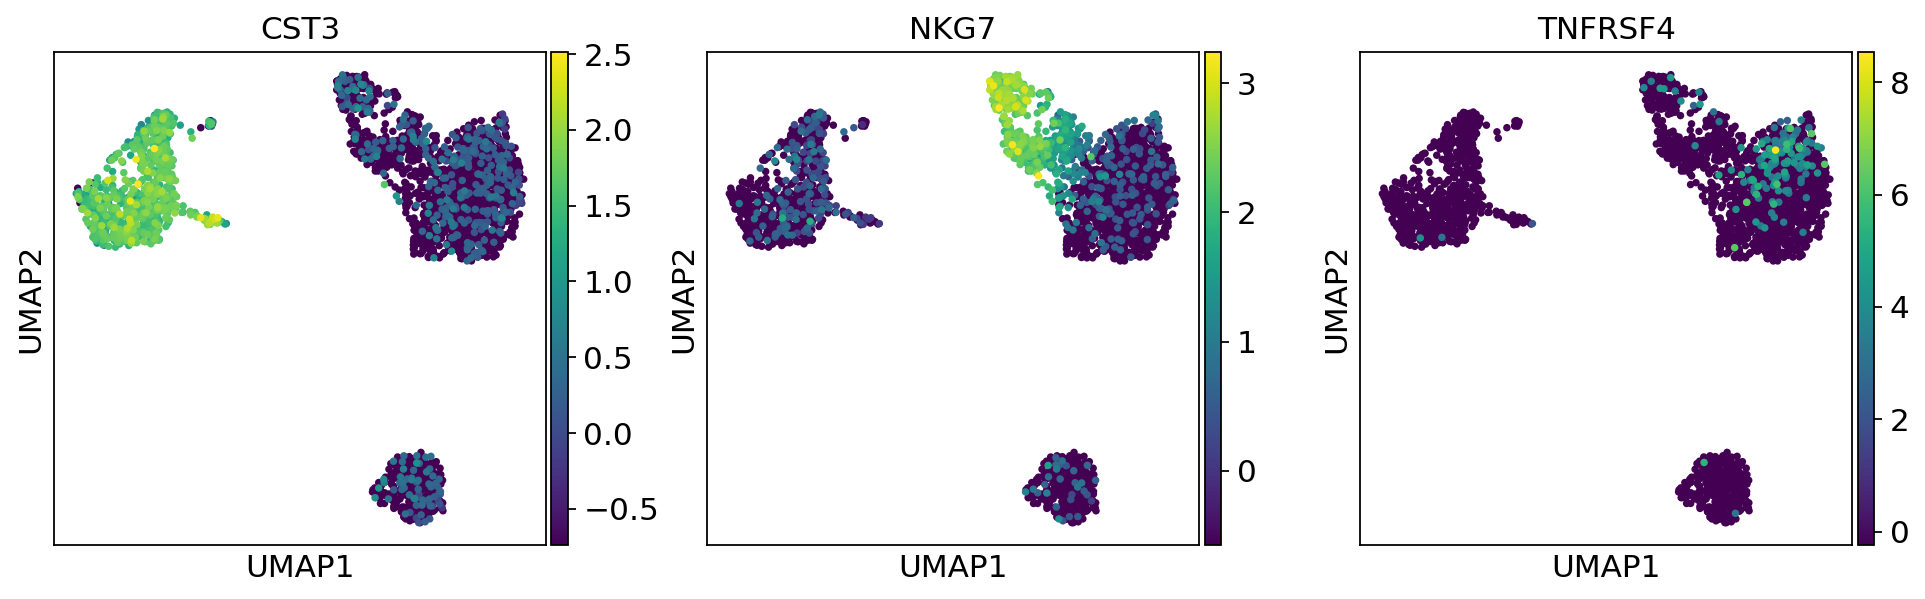

In [ ]:
"""
CST3 grafiğinde:
Veri noktaları, yeşilden mora doğru değişen renklerle CST3 ifadesinin farklı seviyelerini gösterir.
Bu grafikte belirgin bir küme ayrımı görülür.

NKG7 grafiğinde:
Veri noktaları, mavi ile sarı-yeşil arasında değişen renklerle NKG7 ifadesinin farklı seviyelerini gösterir.
Küme ayrımı, CST3 grafiğine göre daha az belirgindir ama yine de görülebilir.

TNFRSF4 grafiğinde:
Tüm veri noktaları, mor tonlarındadır; bu da TNFRSF4 ifadesinin tüm örneklerde veya hücrelerde benzer seviyelerde olduğunu gösterir.
"""

sc.pl.umap(umHVG_data,color=['CST3', 'NKG7', 'TNFRSF4'])